In [2]:
"""Experiment with perturbation rule

"""

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

from src.perturbation import perturbation_rule, randomly_perturb_ecosystems

In [3]:
help(perturbation_rule)

Help on function perturbation_rule in module src.perturbation:

perturbation_rule(t, u, params: List)
    Perturbation rule as single system of equations.
    
    This rule is treated as a system of coupled ODE's, so I don't think
    it meets the "master-slave" relationship that is required in the paper.
    Though the alternative would be do something like the following:
    
    ```
    x0, y0 = solve(perturbed_rule, i=0, u0)
    x1, y1 = solve(perturbed_rule, i=1, u1)
    x2, y2 = solve(perturbed_rule, i=2, u2, args=((x0,y0), (x1, y1)))
    ...
    xn-1,yn-1 = solve(
        perturbed_rule, i=n-1, un-1, args=((xi,yi) for i in range(n))
    ```
    
    Args:
        t: Timestep argument required by scipy.
        u: A state vector of shape [n * 2]. Element `i` is density of 
            young trees and element `i+1` is the density of old trees.
        params: Parameters for ecosystem dynamics. Parameters should be
            passed exactly in this order.
            - rho: Ferti

In [4]:
# phase space figure 1
n_ecosystems = 1
params = dict(
    rho = 4.2,
    f = 1,
    a_1 = 0,
    h = 2,
    a_2 = 0,
    dists = None, # should there be n-distances here??
    w_0 = 1,
    alpha_0=-1,
    beta_2 = 1,
    l = 600,
    P_0 = 1,
    ecosystem_id_t_star = None,
    n_ecosystems = n_ecosystems,
)

In [5]:
# SOlutions for figure 1
T = 50
n_points = 50
solutions_at_u0 = []
u0s = np.random.uniform(low=0, high=4, size=(n_points, 2))
for u0 in u0s:
    solutions = solve_ivp(
        perturbation_rule,
        [0, T],
        y0=u0,
        args=(params.values(),))
    solutions_at_u0.append(solutions.y)

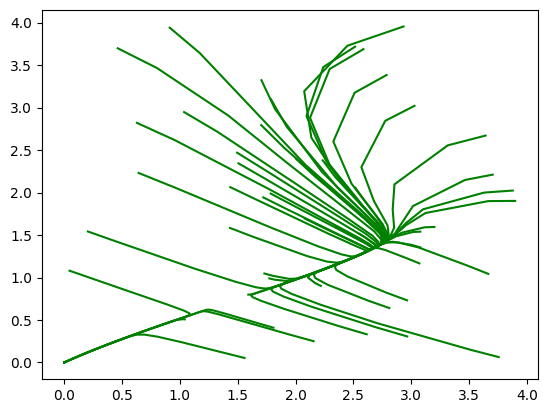

In [6]:
# Figure 1
for solution in solutions_at_u0:
    plt.plot(solution[0, :], solution[1, :], color="g")

In [7]:
# Reproducing figure 7
n_ecosystems = 2
params = dict(
    rho = 4.2,
    f = 1,
    a_1 = 1,
    h = 2,
    a_2 = 0,
    dists = [42], # should there be n-distances here??
    w_0 = 1,
    alpha_0=-1,
    beta_2 = 1,
    l = 600,
    P_0 = 1,
    ecosystem_id_t_star = None,
    n_ecosystems = n_ecosystems,
)

(0.0, 3.0)

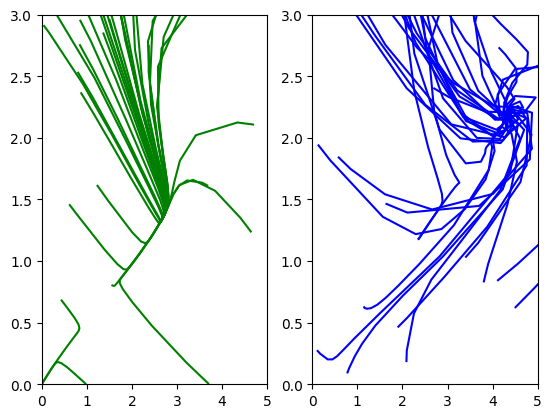

In [10]:
# solve for fig 7
t0 = 0
tf = 50
n_points = 35
y0s = np.random.uniform(
    low=0, high=5, size=(n_points, 2 * params["n_ecosystems"]))

solutions_at_u0 = []
for ix, y0 in enumerate(y0s):
    solutions = solve_ivp(
        perturbation_rule,
        t_span=(t0, tf),
        y0=y0,
        args=(params.values(),))
    solutions_at_u0.append(solutions.y)

fig, axs = plt.subplots(nrows=1, ncols=2)
for solution in solutions_at_u0:
    axs[0].plot(solution[0, :], solution[1, :], color="g")
    axs[1].plot(solution[2, :], solution[3, :], color="b")
axs[0].set_ylim(0, 3)
axs[0].set_xlim(0, 5)

axs[1].set_xlim(0, 5)
axs[1].set_ylim(0, 3)

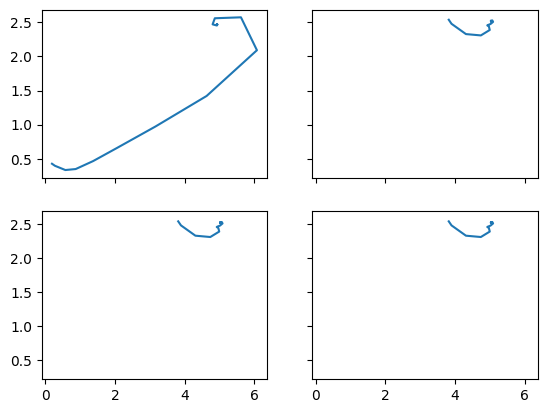

In [21]:
x1, y1 = solutions.y[0, :], solutions.y[1, :]
x2, y2 = solutions.y[2, :], solutions.y[3, :]
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
ax[0,0].plot(x1, y1)
ax[0,1].plot(x2, y2) # TODO: d1 = 42
ax[1,0].plot(x2, y2) # TODO: d1 = 150
ax[1,1].plot(x2, y2) # TODO: d1 = 700

2


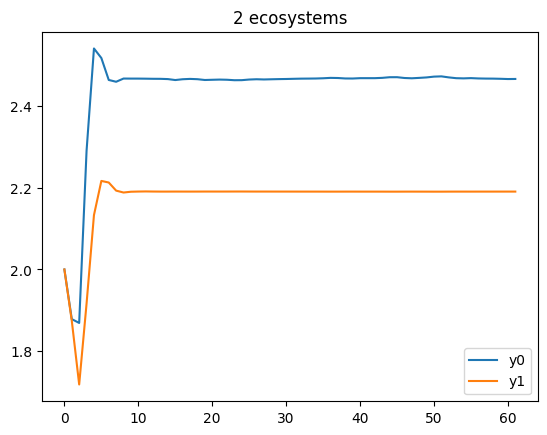

In [37]:
# Reproducing figure 8
for n_ecosystems in range(2, 3):
    print(n_ecosystems)
    params = dict(
        rho = 4.2,
        f = 1,
        a_1 = 1,
        h = 2,
        a_2 = 0,
        dists = n_ecosystems*[900/(n_ecosystems - 1)],
        w_0 = 1,
        alpha_0=-1,
        beta_2 = 0.15,
        l = 600,
        P_0 = 1.05,
        ecosystem_id_t_star = None,
        n_ecosystems = n_ecosystems,
    )

    #y0 = np.random.uniform(low=50, high=4, size=(2 * params["n_ecosystems"]))
    y0 = 2*np.ones(shape=(2*params["n_ecosystems"]))

    # solve for fig 8
    t0 = 0
    tf = 50
    solutions = solve_ivp(
        perturbation_rule,
        [t0, tf],
        y0,
        args=(params.values(),))
    
    fig, ax = plt.subplots()
    ys = solutions.y[1:len(solutions.y):2]
    for i in range(len(ys)):
        ax.plot(ys[i], label=f"y{i}")
        #ax.set_ylim(0, 2)
    plt.legend()
    plt.title(f"{n_ecosystems} ecosystems")
    plt.show()
    plt.close(fig)